In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../../..", "Code")))
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
from tools_.tools import *
from vis_functions import *


2024-08-25 13:52:31.163745: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-25 13:52:31.191472: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-25 13:52:31.191490: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-25 13:52:31.192364: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-25 13:52:31.198095: I tensorflow/core/platform/cpu_feature_guar

In [10]:
#CONFIGURATION

experiment= '20240825-115418_EXP_0'
model='modelLA_LIPV_150119'



In [11]:
tikhonov, fs_tk= load_signals('Tik')
dl, fs_dl= load_signals('DL', experiment=experiment)


In [12]:
loaded_models_dl =[]
for key in dl.keys():
    if key != '__header__' and  key != '__version__' and   key != '__globals__':
        loaded_models_dl.append(key)
loaded_models_tk =[]
for key in tikhonov.keys():
    if key != '__header__' and  key != '__version__' and   key != '__globals__':
        loaded_models_tk.append(key)

common_models = np.intersect1d(loaded_models_dl, loaded_models_dl)


print('* Model loaded from selected DL experiment:', loaded_models_dl)
print('* Model loaded from selected Tikhonov experiment:',loaded_models_tk)
print(' --> Models that therefore can be evaluated:', common_models)



* Model loaded from selected DL experiment: ['modelLA_PLAW_140612', 'modelTwoRotors_181219', 'modelSinusal_150629', 'modelLA_RIPV_150121', 'modelSimulation_01_190502_001_003', 'modelLA_LIPV_150119', 'modelLA_RSPV_CAF_150115', 'modelSimulation_01_190502_001_006', 'modelSimulation_01_210205_001_002', 'modelRA_RAA_141216', 'modelSimulation_01_201223_001_002', 'modelSimulation_01_210208_001_002', 'modelRA_RAFW_140807']
* Model loaded from selected Tikhonov experiment: ['modelLA_LIPV_150119', 'modelLA_LSPV_150113', 'modelLA_LSPV_150203', 'modelLA_PLAW_140612', 'modelLA_PLAW_140711_arm', 'modelLA_RIPV_150121', 'modelLA_RSPV_150113', 'modelLA_RSPV_CAF_150115', 'modelRA_RAA_141216', 'modelRA_RAA_141230', 'modelRA_RAFW_140807', 'modelRA_RAFW_SAF_140730', 'modelSimulation_01_190502_001_003', 'modelSimulation_01_190502_001_004', 'modelSimulation_01_190502_001_005', 'modelSimulation_01_190502_001_006', 'modelSimulation_01_190619_001_001', 'modelSimulation_01_190619_001_002', 'modelSimulation_01_19

Extract signals from dictionaries

In [13]:

dl_label=dl[model]['label'][0][0]
dl_signal=dl[model]['reconstruction'][0][0]
tikhonov_label=tikhonov[model]['label'][0][0]
tikhonov_signal=tikhonov[model]['reconstruction'][0][0]


In [14]:

#Process tikhonov to match dl processing

if fs_dl < fs_tk:
    #Subsampling
    print('fs_dl:', fs_dl, 'and fs_tik:', fs_tk)
    tikhonov_signal = signal.resample_poly(tikhonov_signal, fs_dl, 500, axis=0)
    tikhonov_label = signal.resample_poly(tikhonov_label, fs_dl, 500, axis=0)
    print('Tik Shape:', tikhonov_signal.shape, '| DL shape:', dl_signal.shape )



fs_dl: 200 and fs_tik: 500
Tik Shape: (800, 2048) | DL shape: (8000, 1366)


Model modelLA_LIPV_150119


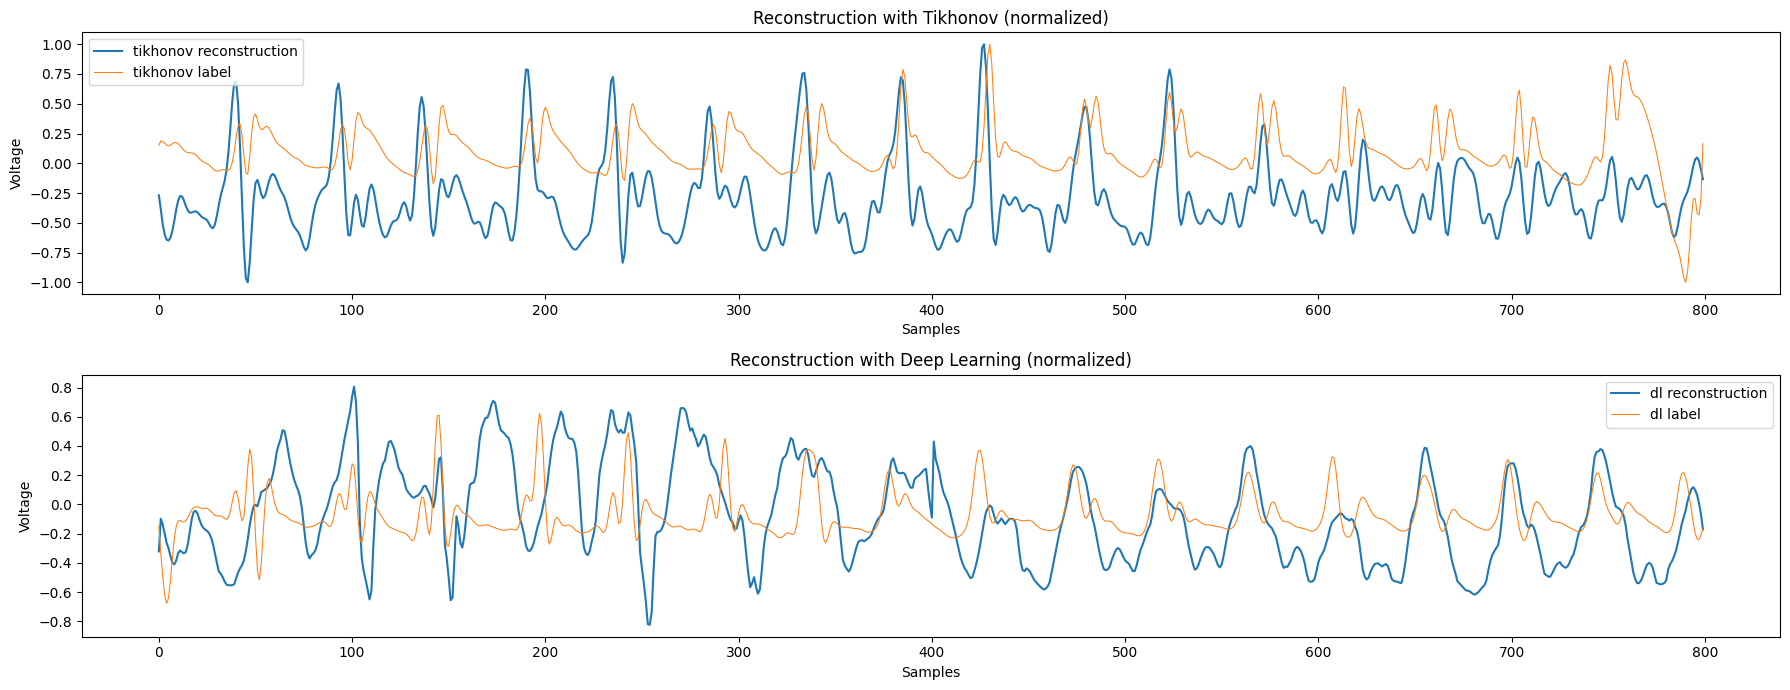

In [15]:
print('Model', model)
plot_1D_signals(tikhonov_signal, tikhonov_label, dl_signal, dl_label,
                node = 1,
                torso = 5,
                n_samples= 5000,
                normalize_tik= True,
                filter_tik_label= False)



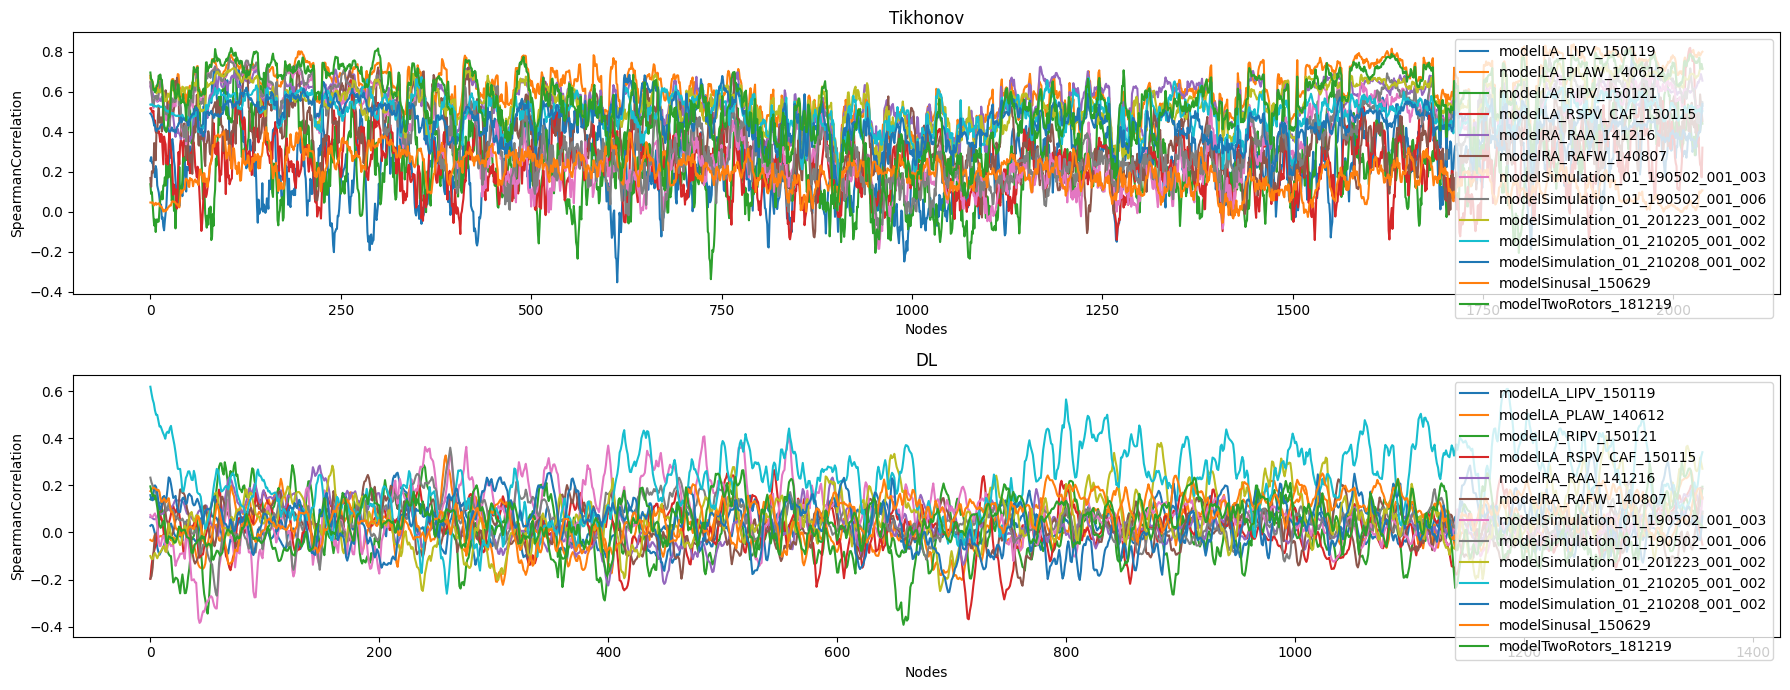

In [8]:
plot_correlation_by_nodes(range_of_models=common_models, smoothing = 10, type_corr = 'Spearman', experiment=experiment)

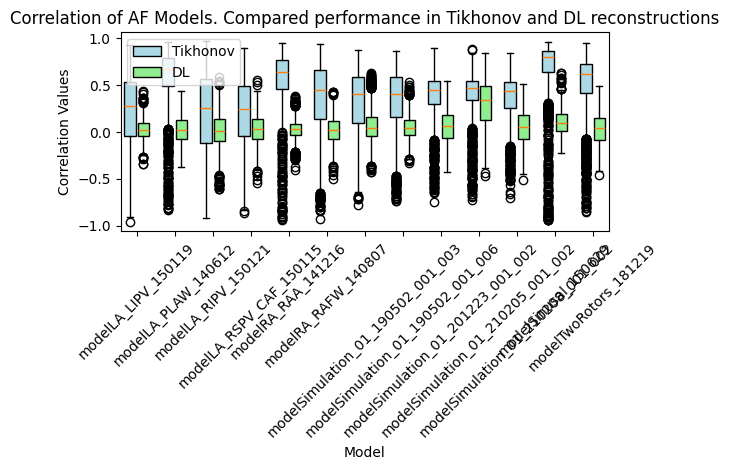

In [9]:
plot_correlation_by_models(range_of_models=common_models, type_corr = 'Pearson', separation = 0.7, rotation=45, experiment = experiment)